In [1]:
# load all data.text to data 
import pandas as pd
data1= pd.read_csv('datasetSentences.txt',sep ='\t', header=None)
data2 = data1.drop(0, 1)
data3= pd.read_csv('datasetSplit.txt',sep =',', header=None)
data4 = data3.drop(0, 1)
data5 = pd.read_csv('sentiment_labels.txt',sep ='|', header=None)
data6 = data5.drop(0,1)
data2.columns =['sentences']
data2_drop = data2.drop(data2.index[0])
data4.columns =['datasplit']
data4_drop = data4.drop(data4.index[0])
data6.columns =['Sentiment_value']
data6_drop = data6.drop(data4.index[0])
data2['datasetsplit'] = data4_drop
data2_drop= data2.drop(data2.index[0])
data2_drop
data2_drop['sentimenvalue'] = data6_drop
data = data2_drop
data



,sentences,datasetsplit,sentimenvalue
1,The Rock is destined to be the 21st Century 's...,1,0.5
2,The gorgeously elaborate continuation of `` Th...,1,0.5
3,Effective but too-tepid biopic,2,0.44444
4,If you sometimes like to go to the movies to h...,2,0.5
5,"Emerges as something rare , an issue movie tha...",2,0.42708
...,...,...,...
11851,A real snooze .,1,0.44444
11852,No surprises .,1,0.19444
11853,We 've seen the hippie-turned-yuppie plot befo...,1,0.61111
11854,Her fans walked out muttering words like `` ho...,1,0.72222


In [2]:
# train and test process
from sklearn.model_selection import train_test_split
sentences = data['sentences']
y = data.datasetsplit
sentences_train,sentences_test,y_train,y_test=train_test_split(sentences,y,test_size=0.2)




In [3]:
# extraction data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)


In [4]:
# machine learning - logistic regression testing
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)


/home/rama/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rama/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [5]:
# final result
score

0.6693378321383383

In [6]:
# artificial neural network testing

In [13]:
from keras import layers
from keras.models import Sequential


input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras.models import Sequential
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,epochs=5,verbose=False,validation_data=(X_test, y_test),batch_size=10)
print(history.history.keys())
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                161120    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 161,131
Trainable params: 161,131
Non-trainable params: 0
_________________________________________________________________


16111

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

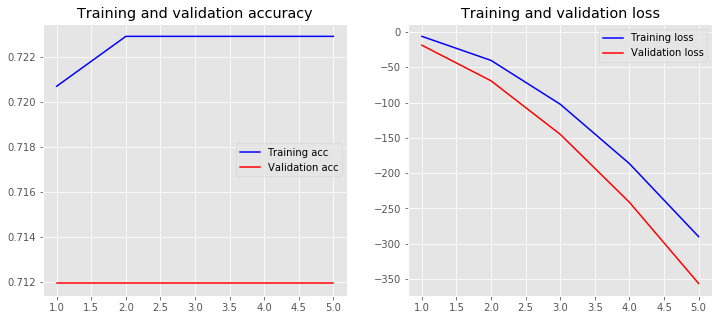

In [12]:
plot_history(history)

In [ ]:
# 5 - 10 epoch is enough to avoid overfitting 